In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
import pandas as pd

In [4]:
train = pd.read_csv("train.csv", index_col = 0)
test = pd.read_csv("test.csv", index_col = 0)



In [7]:
X_train = train.drop(['batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N','ctnum_random','batch_D'], axis = 1)

In [8]:
X_test= test.drop(['batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N','ctnum_random','V19'], axis = 1)

In [9]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F', 'batch_G',
       'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [10]:
X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F', 'batch_G',
       'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [12]:
y_train = train['ctnum_random']
y_test = test['ctnum_random']

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_train.shape

(652, 59)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
model = Sequential()
model.add(Dense(59, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 59)                3540      
                                                                 
 dense_14 (Dense)            (None, 30)                1800      
                                                                 
 dense_15 (Dense)            (None, 30)                930       
                                                                 
 dense_16 (Dense)            (None, 30)                930       
                                                                 
 dense_17 (Dense)            (None, 30)                930       
                                                                 
 dense_18 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8,161
Trainable params: 8,161
Non-traina

In [53]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam')

In [69]:
history = model.fit(X_train,y_train, epochs = 1000, validation_split = 0.2)

Epoch 1/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.0794 - val_loss: 0.6967
Epoch 2/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0714 - val_loss: 0.7260
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0773 - val_loss: 0.7443
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0694 - val_loss: 0.7212
Epoch 5/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0659 - val_loss: 0.6911
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0583 - val_loss: 0.6957
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0506 - val_loss: 0.6847
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0478 - val_loss: 0.6914
Epoch 9/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0492 - val_loss: 0.6731
Epoch 10/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0614 - val_loss: 0.6979

In [70]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [71]:
from sklearn.metrics import *

In [72]:
r2_score(y_test, y_pred)

0.36416052718903325

In [73]:
y_test

418    28.43
474    20.44
181    15.64
446    24.17
297    25.53
       ...  
31     21.12
113    16.84
272    19.11
311    26.11
395    21.19
Name: ctnum_random, Length: 121, dtype: float64

In [74]:
result = pd.DataFrame()
result['Actual'] = y_test 
result['Predicted'] = y_pred 

In [75]:
result

,Actual,Predicted
418,28.43,24.355471
474,20.44,23.884697
181,15.64,19.206827
446,24.17,21.737930
297,25.53,22.313847
...,...,...
31,21.12,17.885899
113,16.84,17.179632
272,19.11,18.422699
311,26.11,24.190706


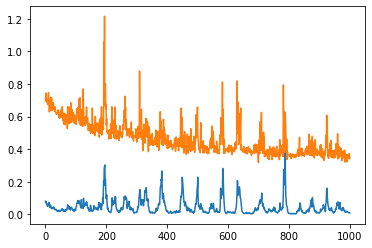

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])